In [ ]:
!pip install sdv

In [95]:
# Import packages
import pandas as pd

In [96]:
trip_data = pd.read_csv("scooter_data_summary.csv") # this is essentially the data_summary file, change the name here to avoid confusion.

In [97]:
trip_data

,trip_id,height_range (cm),weight_range (kg),starting_point,destination_point,duration(s),distance (km),starting_soc,ending_soc,soc/distance,wh/km,average_speed (m/s),average_speed (km/h),start_altitude (m),end_altitude (m),wind_speed (m/s),wind_direction,weather,altitude_difference (m),average_slope (%)
0,1,180-190,90-100,"53.391607, -6.263688","53.385628, -6.257041",273,1.2,97,91,5.00,22.3000,4.40,15.840,57.220276,50.524553,3.00,E,Dry,-6.695723,-0.557977
1,2,160-170,40-50,"53.386021, -6.255587","53.3835218846797, -6.2531907018274",220,1.2,74,69,4.13,18.4100,5.45,19.620,57.002800,53.302900,3.10,NE,Dry,-3.699900,-0.308325
2,3,160-170,40-50,"53.3829, -6.245276","53.3857073, -6.255505364",636,3.5,53,38,4.29,19.1300,5.50,19.800,49.213848,52.817492,0.40,E,Wet,3.603645,0.102961
3,4,180-190,90-100,"53.3856, -6.255942","53.385838, -6.25619",339,1.9,44,34,5.26,23.4600,5.60,20.160,49.873645,52.937486,3.20,NNE,Wet,3.063840,0.161255
4,5,180-190,90-100,"53.385838, -6.25619","53.38513896, -6.253523212",260,1.1,92,84,7.27,32.4200,4.23,15.228,49.543267,50.098765,4.60,S,Dry,0.555498,0.050500
5,6,160-170,40-50,"53.385194, -6.25591","53.391494, -6.26338",343,1.4,86,75,7.86,35.0600,4.08,14.688,51.479923,56.855907,2.10,WSW,Dry,5.375984,0.383999
6,7,160-170,40-50,"53.391494, -6.26338","53.391532, -6.263165",325,1.4,79,71,5.71,25.4700,4.31,14.688,50.123578,49.387459,2.00,WSW,Dry,-0.736119,-0.052580
7,8,160-170,40-50,"53.38603, -6.256422","53.386095, -6.256474",362,1.4,76,70,4.29,19.1300,3.87,13.932,54.260107,51.053453,4.60,SE,Wet,-3.206654,-0.229047
8,9,160-170,40-50,"53.386169, -6.256644","53.385759, -6.255795",483,1.8,69,63,3.33,14.8500,3.73,13.428,52.064305,50.772362,4.60,SE,Wet,-1.291943,-0.071775
9,10,160-170,40-50,"53.385172, -6.255808","53.391475, -6.263179",347,1.4,63,47,4.29,19.1300,4.03,14.508,51.695053,56.856192,7.00,WE,Dry,5.161139,0.368653


In [98]:
# Change the intervals to medians
trip_data['height_range (cm)'] = trip_data['height_range (cm)'].str.extract(r'(?<=-)(\d+)').astype(int) - 5.01
trip_data['weight_range (kg)'] = trip_data['weight_range (kg)'].str.extract(r'(?<=-)(\d+)').astype(int) - 5.01

In [99]:
trip_data

,trip_id,height_range (cm),weight_range (kg),starting_point,destination_point,duration(s),distance (km),starting_soc,ending_soc,soc/distance,wh/km,average_speed (m/s),average_speed (km/h),start_altitude (m),end_altitude (m),wind_speed (m/s),wind_direction,weather,altitude_difference (m),average_slope (%)
0,1,184.99,94.99,"53.391607, -6.263688","53.385628, -6.257041",273,1.2,97,91,5.00,22.3000,4.40,15.840,57.220276,50.524553,3.00,E,Dry,-6.695723,-0.557977
1,2,164.99,44.99,"53.386021, -6.255587","53.3835218846797, -6.2531907018274",220,1.2,74,69,4.13,18.4100,5.45,19.620,57.002800,53.302900,3.10,NE,Dry,-3.699900,-0.308325
2,3,164.99,44.99,"53.3829, -6.245276","53.3857073, -6.255505364",636,3.5,53,38,4.29,19.1300,5.50,19.800,49.213848,52.817492,0.40,E,Wet,3.603645,0.102961
3,4,184.99,94.99,"53.3856, -6.255942","53.385838, -6.25619",339,1.9,44,34,5.26,23.4600,5.60,20.160,49.873645,52.937486,3.20,NNE,Wet,3.063840,0.161255
4,5,184.99,94.99,"53.385838, -6.25619","53.38513896, -6.253523212",260,1.1,92,84,7.27,32.4200,4.23,15.228,49.543267,50.098765,4.60,S,Dry,0.555498,0.050500
5,6,164.99,44.99,"53.385194, -6.25591","53.391494, -6.26338",343,1.4,86,75,7.86,35.0600,4.08,14.688,51.479923,56.855907,2.10,WSW,Dry,5.375984,0.383999
6,7,164.99,44.99,"53.391494, -6.26338","53.391532, -6.263165",325,1.4,79,71,5.71,25.4700,4.31,14.688,50.123578,49.387459,2.00,WSW,Dry,-0.736119,-0.052580
7,8,164.99,44.99,"53.38603, -6.256422","53.386095, -6.256474",362,1.4,76,70,4.29,19.1300,3.87,13.932,54.260107,51.053453,4.60,SE,Wet,-3.206654,-0.229047
8,9,164.99,44.99,"53.386169, -6.256644","53.385759, -6.255795",483,1.8,69,63,3.33,14.8500,3.73,13.428,52.064305,50.772362,4.60,SE,Wet,-1.291943,-0.071775
9,10,164.99,44.99,"53.385172, -6.255808","53.391475, -6.263179",347,1.4,63,47,4.29,19.1300,4.03,14.508,51.695053,56.856192,7.00,WE,Dry,5.161139,0.368653


In [101]:
# drop unnecessary columns
# trip_data = trip_data.drop(['starting_point','destination_point'], axis=1)
trip_data = trip_data[['height_range (cm)', 'weight_range (kg)', 'average_speed (km/h)', 'altitude_difference (m)', 'average_slope (%)', 'wind_direction', 'wind_speed (m/s)', 'weather', 'wh/km']]
real_data = trip_data

real_data

,height_range (cm),weight_range (kg),average_speed (km/h),altitude_difference (m),average_slope (%),wind_direction,wind_speed (m/s),weather,wh/km
0,184.99,94.99,15.840,-6.695723,-0.557977,E,3.00,Dry,22.3000
1,164.99,44.99,19.620,-3.699900,-0.308325,NE,3.10,Dry,18.4100
2,164.99,44.99,19.800,3.603645,0.102961,E,0.40,Wet,19.1300
3,184.99,94.99,20.160,3.063840,0.161255,NNE,3.20,Wet,23.4600
4,184.99,94.99,15.228,0.555498,0.050500,S,4.60,Dry,32.4200
5,164.99,44.99,14.688,5.375984,0.383999,WSW,2.10,Dry,35.0600
6,164.99,44.99,14.688,-0.736119,-0.052580,WSW,2.00,Dry,25.4700
7,164.99,44.99,13.932,-3.206654,-0.229047,SE,4.60,Wet,19.1300
8,164.99,44.99,13.428,-1.291943,-0.071775,SE,4.60,Wet,14.8500
9,164.99,44.99,14.508,5.161139,0.368653,WE,7.00,Dry,19.1300


In [43]:
#real_data.to_csv('real_data.csv')

In [102]:
import sdv
print(sdv.__version__)

1.6.0


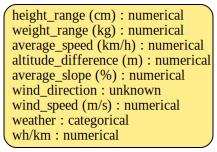

In [103]:
# check metadata
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(data=real_data)
metadata.visualize()

In [104]:
metadata.update_column(
    column_name='wind_direction',
    sdtype='categorical')

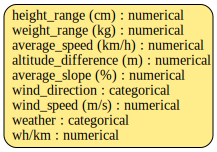

In [105]:
metadata.visualize()

In [106]:
# generate M rows of fake data
M = 10000
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

synthesizer.fit(
    data=real_data
)

synthetic_data = synthesizer.sample(
    num_rows=M
)

synthetic_data.head()

/usr/local/lib/python3.10/dist-packages/rdt/transformers/categorical.py:329: FutureWarning: The 'FrequencyEncoder' transformer will no longer be supported in future versions of the RDT library. Please use the 'UniformEncoder' transformer instead.
  warnings.warn(


,height_range (cm),weight_range (kg),average_speed (km/h),altitude_difference (m),average_slope (%),wind_direction,wind_speed (m/s),weather,wh/km
0,179.628842,82.080314,18.541500,-2.444658,-0.185220,E,3.460805,Wet,27.966002
1,184.990000,89.864433,7.905930,5.375984,0.362820,W,6.434354,Dry,18.373063
2,183.860348,88.810445,17.843658,-1.308099,-0.042887,SSE,7.414369,Dry,21.303443
3,164.990000,44.990000,17.344015,-3.299602,-0.251017,SSE,6.913920,Dry,16.061810
4,168.393138,44.990000,10.355247,-5.542150,-0.362288,SSE,6.573814,Dry,18.598034


In [107]:
# evaluation
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 51.94it/s]

Overall Quality Score: 81.23%

Properties:
- Column Shapes: 83.62%
- Column Pair Trends: 78.83%


In [108]:
synthetic_data.to_csv('fake_data_new.csv')